# 1. Load Dataset

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# 훈련데이터에서 가장 많이 나타나는 10000개 단어만 사용

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels.shape

(25000,)

In [ ]:
# 리뷰를 다시 텍스트로 디코딩 한다.
word_idx = imdb.get_word_index() #단어 인덱스 딕셔너리
reverse_word_index = dict( # 딕셔너리 뒤집어서 매핑 할 수 있게 함
    [(value, key) for (key, value) in word_idx.items()]
)
decoded_review = ' '.join( # 0,1,2 부분이 패딩, 문서 시작, 사전 없음 이라서 -3 해준다.
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]] #매핑 안되면 '?'로 바꾼다.
)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
list(word_idx.items())[:5]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951)]

In [ ]:
decoded_review[0:10]

'? this fil'

# 2. 데이터 준비
- 문자열이 길이가 다르다는 문제가 있음.

방법 1. 리스트 패딩하기

방법 2. 멀티 핫 인코딩 하기 (여기서는 10000 차원으로 인코딩 되겠다)

In [ ]:
# 멀티 핫 벡터로 인코딩
import numpy as np

def vectorize_sequences(sequences, dim = 10000):
    results = np.zeros((len(sequences),dim))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1. # i번째 데이터의 j 단어를 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [41]:
x_train.shape

(25000, 10000)

# 3. 신경망 모델 만들기

- 얼마나 많은 층을 쓸 것인가?
- 각 층에 얼마나 많은 유닛을 둘 것인가?

```
- 16개 유닛
- 2개 중간층
- 감정 예측을 위한 출력층
```

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"), #유닛 수, activation func
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# 모델 컴파일: optimizer, loss, metric선택
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", #binary classification,
              metrics=["accuracy"])

# 4. Train and Validation


In [ ]:
# 검증을 위한 validation set만들어두기
x_val = x_train[:10000] # 60000개 중에서 100000개 사용
y_val = y_train[:10000]

partial_x_train = x_train[10000:] # 나머지 50000개
partial_y_train = y_train[10000:]

In [ ]:
# 모델 학습하기
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 전체 20 에폭 학습
    batch_size=512, #미니배치 크기 512
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7158 - loss: 0.5896 - val_accuracy: 0.8568 - val_loss: 0.3942
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8969 - loss: 0.3330 - val_accuracy: 0.8829 - val_loss: 0.3085
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9192 - loss: 0.2440 - val_accuracy: 0.8904 - val_loss: 0.2796
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9426 - loss: 0.1862 - val_accuracy: 0.8771 - val_loss: 0.3046
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9454 - loss: 0.1653 - val_accuracy: 0.8829 - val_loss: 0.2884
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9529 - loss: 0.1413 - val_accuracy: 0.8715 - val_loss: 0.3256
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9628 - loss: 0.1189 - val_accuracy: 0.8756 - val_loss: 0.3192
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9734 - loss: 0.0977 - val_accuracy: 0.8804 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

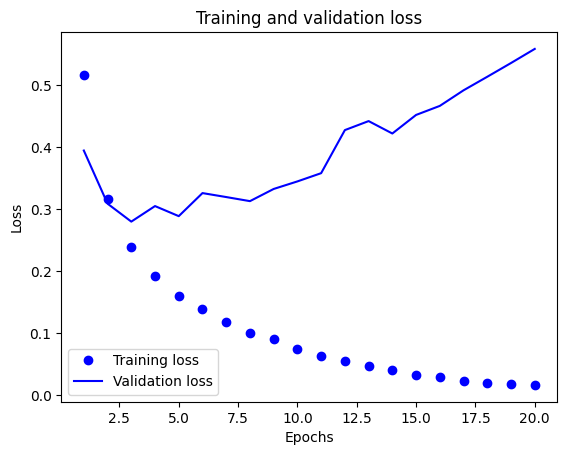

In [ ]:
# train, val loss plot
import matplotlib.pyplot as plt

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

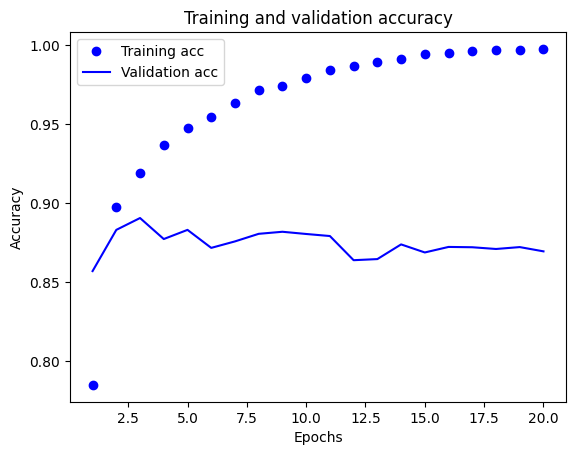

In [ ]:
# loss를 봤으니, 훈련과 검증 정확도 확인
plt.clf()

acc= history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"), #유닛 수, activation func
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", #binary classification,
              metrics=["accuracy"])
model.fit(x_train,y_train,epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7490 - loss: 0.5501
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9091 - loss: 0.2814
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9236 - loss: 0.2134
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9363 - loss: 0.1755
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8836 - loss: 0.2856


In [ ]:
results

[0.28454577922821045, 0.8862800002098083]

# 5. 훈련 완료 후 Test

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.22154136],
       [0.9995287 ],
       [0.6619511 ],
       ...,
       [0.09374044],
       [0.05523013],
       [0.47744837]], dtype=float32)

# 6. 추가 실험

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.7146 - loss: 0.5696 - val_accuracy: 0.8631 - val_loss: 0.3936
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8977 - loss: 0.3299 - val_accuracy: 0.8812 - val_loss: 0.3237
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9178 - loss: 0.2587 - val_accuracy: 0.8902 - val_loss: 0.2898
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9315 - loss: 0.2142 - val_accuracy: 0.8896 - val_loss: 0.2791
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9437 - loss: 0.1809 - val_accuracy: 0.8892 - val_loss: 0.2746
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9521 - loss: 0.1587 - val_accuracy: 0.8886 - val_loss: 0.2747
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9601 - loss: 0.1419 - val_accuracy: 0.8882 - val_loss: 0.2772
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9639 - loss: 0.1285 - val_accuracy: 0.8835 - v

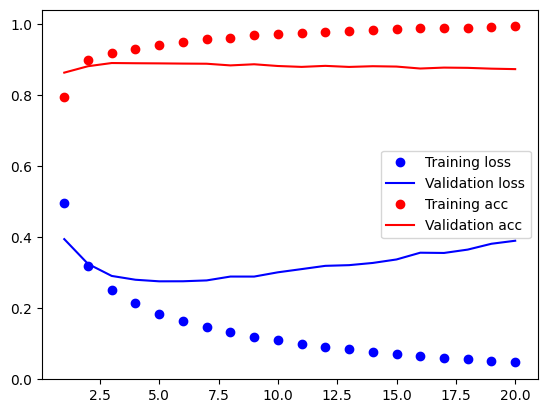

In [ ]:
# 중간 층 개수 1개
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history=model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 전체 20 에폭 학습
    batch_size=512, #미니배치 크기 512
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, y_test)

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc= history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6858 - loss: 0.6208 - val_accuracy: 0.8618 - val_loss: 0.4179
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8883 - loss: 0.3613 - val_accuracy: 0.8678 - val_loss: 0.3392
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9171 - loss: 0.2483 - val_accuracy: 0.8854 - val_loss: 0.2886
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9381 - loss: 0.1903 - val_accuracy: 0.8807 - val_loss: 0.2993
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9481 - loss: 0.1596 - val_accuracy: 0.8770 - val_loss: 0.3257
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9611 - loss: 0.1281 - val_accuracy: 0.8835 - val_loss: 0.2951
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9676 - loss: 0.1062 - val_accuracy: 0.8684 - val_loss: 0.3541
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9723 - loss: 0.0940 - val_accuracy: 0.8814 - v

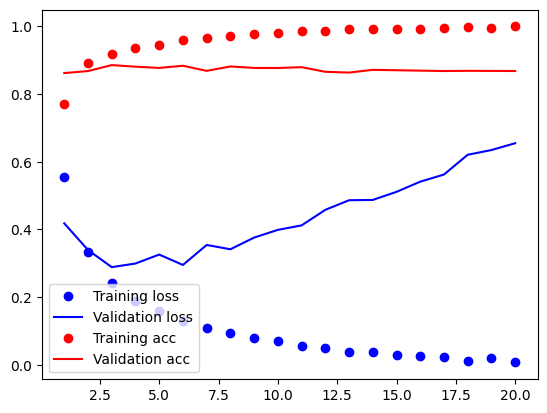

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history=model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 전체 20 에폭 학습
    batch_size=512, #미니배치 크기 512
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, y_test)

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc= history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.7002 - loss: 0.5970 - val_accuracy: 0.8695 - val_loss: 0.3878
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8941 - loss: 0.3335 - val_accuracy: 0.8787 - val_loss: 0.3153
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9185 - loss: 0.2407 - val_accuracy: 0.8777 - val_loss: 0.3001
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9379 - loss: 0.1897 - val_accuracy: 0.8884 - val_loss: 0.2769
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9535 - loss: 0.1488 - val_accuracy: 0.8830 - val_loss: 0.2940
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9580 - loss: 0.1277 - val_accuracy: 0.8557 - val_loss: 0.3783
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9668 - loss: 0.1070 - val_accuracy: 0.8710 - val_loss: 0.3464
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9748 - loss: 0.0896 - val_accuracy: 0.8757 - v

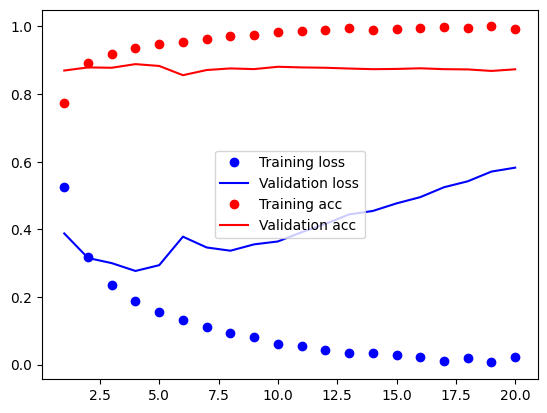

In [ ]:
# 유닛 수 바꾸기
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history=model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 전체 20 에폭 학습
    batch_size=512, #미니배치 크기 512
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, y_test)

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc= history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.6693 - loss: 0.5930 - val_accuracy: 0.8584 - val_loss: 0.3686
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8903 - loss: 0.3078 - val_accuracy: 0.8861 - val_loss: 0.2903
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9298 - loss: 0.2077 - val_accuracy: 0.8880 - val_loss: 0.2744
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9403 - loss: 0.1717 - val_accuracy: 0.8866 - val_loss: 0.2812
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9544 - loss: 0.1345 - val_accuracy: 0.8836 - val_loss: 0.2923
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9665 - loss: 0.1063 - val_accuracy: 0.8833 - val_loss: 0.3146
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9767 - loss: 0.0831 - val_accuracy: 0.8839 - val_loss: 0.3249
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9696 - loss: 0.0875 - val_accuracy: 0.8609 

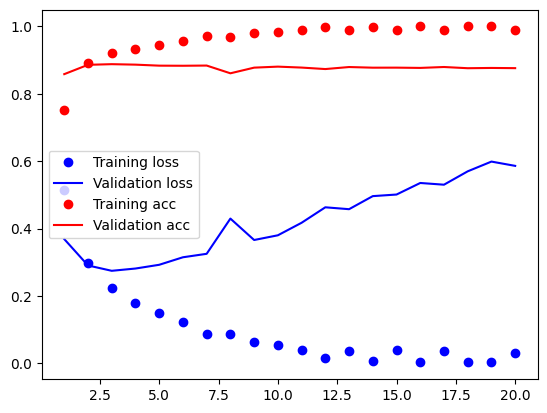

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history=model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 전체 20 에폭 학습
    batch_size=512, #미니배치 크기 512
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, y_test)

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc= history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6872 - loss: 0.2129 - val_accuracy: 0.8602 - val_loss: 0.1314
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8813 - loss: 0.1141 - val_accuracy: 0.8813 - val_loss: 0.0997
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9175 - loss: 0.0772 - val_accuracy: 0.8813 - val_loss: 0.0924
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9362 - loss: 0.0608 - val_accuracy: 0.8866 - val_loss: 0.0845
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9463 - loss: 0.0518 - val_accuracy: 0.8888 - val_loss: 0.0835
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9586 - loss: 0.0422 - val_accuracy: 0.8808 - val_loss: 0.0867
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9666 - loss: 0.0365 - val_accuracy: 0.8799 - val_loss: 0.0869
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9687 - loss: 0.0335 - val_accuracy: 0.8831 - v

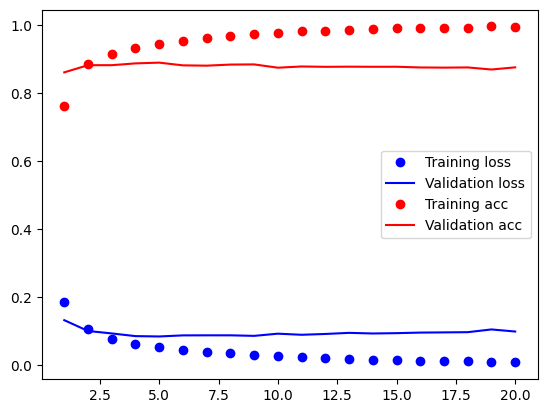

In [ ]:
# mse loss func
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history=model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 전체 20 에폭 학습
    batch_size=512, #미니배치 크기 512
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, y_test)

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc= history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.6958 - loss: 0.5872 - val_accuracy: 0.8704 - val_loss: 0.3727
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8969 - loss: 0.3149 - val_accuracy: 0.8830 - val_loss: 0.2970
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9222 - loss: 0.2240 - val_accuracy: 0.8890 - val_loss: 0.2711
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9421 - loss: 0.1699 - val_accuracy: 0.8805 - val_loss: 0.2909
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9589 - loss: 0.1276 - val_accuracy: 0.8754 - val_loss: 0.3240
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9671 - loss: 0.1026 - val_accuracy: 0.8804 - val_loss: 0.3199
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9749 - loss: 0.0828 - val_accuracy: 0.8780 - val_loss: 0.3526
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9833 - loss: 0.0617 - val_accuracy: 0.8676 - v

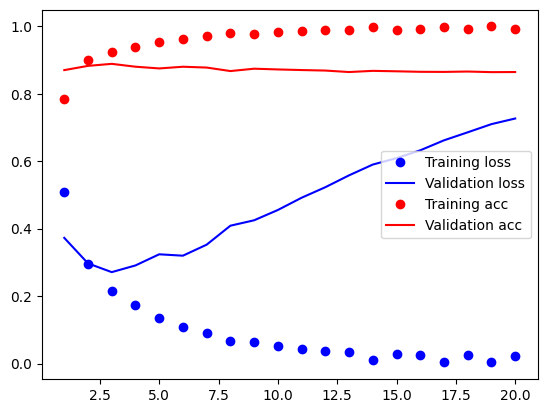

In [ ]:
# tanh activation
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history=model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 전체 20 에폭 학습
    batch_size=512, #미니배치 크기 512
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, y_test)

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc= history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.legend()
plt.show()

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hist_array = np.array(test_labels) == np.array(test_labels_copy)
hist_array.mean()

np.float64(0.49936)